In [1]:

from ConceptFingerprint.Classifier.feature_selection.mutual_information import information_gain_normal_distributions_HxCond_UN,information_gain_normal_distributions_UN,information_gain_normal_distributions_HxCond, information_gain_normal_distributions_Hx,normal_distribution_entropy,MI_estimation, information_gain_normal_distributions_JS, information_gain_normal_distributions_uniform, information_gain_normal_distributions, information_gain_normal_distributions_KL, information_gain_normal_distributions_swap, information_gain_normal_distributions_sym, KL_divergence
import numpy as np
import pandas as pd
import math
import random
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import tqdm
from ConceptFingerprint.Classifier.meta_info_classifier import (
    FingerprintBinning,
    Normalizer,
    mi_from_fingerprint_histogram
)
from ConceptFingerprint.Classifier.meta_info_classifier import DSClassifier
from ConceptFingerprint.Classifier.hoeffding_tree_shap import HoeffdingTreeSHAPClassifier
import matplotlib.pyplot as plt

def next_sample(concept):
    stats = {}
    X_vec = []
    if concept == 0:
        source1 = {}
        source1["F1"] = np.random.normal(0, 1)
        source1["F2"] = np.random.random()
        source1["F3"] = np.random.random() * 10
        stats["S1"] = source1
        source2 = {}
        source2["F1"] = np.random.random()
        source2["F2"] = np.random.random() * 5
        source2["F3"] = np.random.random() * 10
        stats["S2"] = source2
        source3 = {}
        source3["F1"] = np.random.normal(0, 1)
        source3["F2"] = np.random.normal(5, 1)
        source3["F3"] = np.random.normal(10, 5)
        stats["S3"] = source3
    else:
        source1 = {}
        source1["F1"] = np.random.normal(0, 1)
        source1["F2"] = np.random.random()
        source1["F3"] = np.random.random() * 10
        stats["S1"] = source1
        source2 = {}
        source2["F1"] = np.random.random() + 10
        source2["F2"] = np.random.random()
        source2["F3"] = np.random.random() * 5 + 5
        stats["S2"] = source2
        source3 = {}
        source3["F1"] = np.random.normal(10, 1)
        source3["F2"] = np.random.normal(5, 5)
        source3["F3"] = np.random.normal(0, 1)
        stats["S3"] = source3
    for s in stats:
        for f in stats[s]:
            X_vec.append(stats[s][f])
    y = 0 if sum(X_vec) < 25 else 1
    if concept > 0:
        y = 1 if sum(X_vec) < 25 else 0
    return stats, X_vec, y
def next_sample_small(concept):
    stats = {}
    X_vec = []
    if concept == 0:
        source1 = {}
        source1["F1"] = np.random.normal(0, 1)
        source1["F2"] = np.random.random()
        stats["S1"] = source1
        source2 = {}
        source2["F1"] = np.random.normal(0, 1)
        source2["F2"] = np.random.random()
        stats["S2"] = source2
    else:
        source1 = {}
        source1["F1"] = np.random.normal(0, 1)
        source1["F2"] = np.random.random()
        stats["S1"] = source1
        source2 = {}
        source2["F1"] = np.random.normal(10, 1)
        source2["F2"] = np.random.random() * 5 + 5
        stats["S2"] = source2
    for s in stats:
        for f in stats[s]:
            X_vec.append(stats[s][f])
    y = 0 if sum(X_vec) < 25 else 1
    if concept > 0:
        y = 1 if sum(X_vec) < 25 else 0
    return stats, X_vec, y




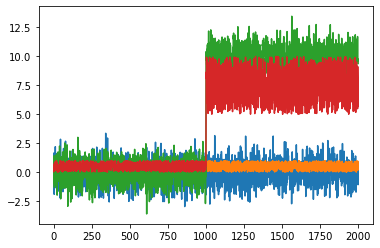

In [2]:
#%%
observations = []
for i in range(2000):
    stats, X, y = next_sample_small(0 if i < 1000 else 1)
    observations.append((X, y))

#%%
stats, X, y = next_sample_small(0 if i < 1000 else 1)
plt.clf()
for f in range(len(X)):
    plt.plot([x[f] for x,y in observations])
plt.show()




In [3]:
# def test_integration():
#%%
fisher_cls = DSClassifier(learner=HoeffdingTreeSHAPClassifier, feature_selection_method='fisher')
monitor = []
force = True
for X, y in tqdm.tqdm(observations):
    observation_monitoring = {}
    drift_occured = False
    concept_drift = False
    concept_drift_target = None
    concept_transition = False
    fisher_cls.manual_control = False
    fisher_cls.force_stop_learn_fingerprint = False
    fisher_cls.force_transition = False
    window_size = 75
    for c in [1]:
        concept_start= 1000
        if i == concept_start + window_size + 10:
            concept_drift = True
            concept_drift_target = c
    if concept_drift and force:
        fisher_cls.manual_control = True
        fisher_cls.force_transition = True
        fisher_cls.force_stop_learn_fingerprint = True
        fisher_cls.force_transition_to = concept_drift_target
    if force:
        fisher_cls.force_transition_only = True
    fisher_cls.partial_fit([X], [y], classes=[0, 1])
    current_active_model = fisher_cls.active_state
    observation_monitoring['active_model'] = current_active_model
    weights = fisher_cls.monitor_feature_selection_weights
    if weights is not None:
        observation_monitoring['feature_weights'] = {}
        for s,f,v in weights:
            if s not in observation_monitoring['feature_weights']:
                observation_monitoring['feature_weights'][s] = {}
            observation_monitoring['feature_weights'][s][f] = v
    else:
        observation_monitoring['feature_weights'] = None
    monitor.append(observation_monitoring)



100%|██████████| 2000/2000 [00:16<00:00, 123.86it/s]


In [ ]:
#%%
[v['active_model'] for v in monitor]
